In [1]:
pip install ultralytics opencv-python numpy


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



C:\Users\admin1\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0: 640x544 2 rights, 1 chin, 149.9ms
Speed: 8.6ms preprocess, 149.9ms inference, 383.4ms postprocess per image at shape (1, 3, 640, 544)
✅ Đã lưu ảnh cắt ra theo đa giác tại: cropped_face.png


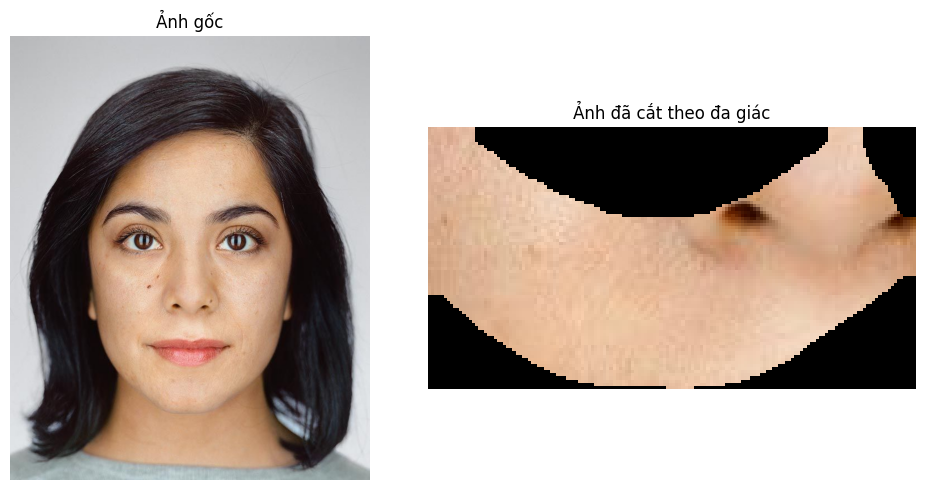

In [3]:
# YOLOv8 Segmentation - Cắt vùng mặt theo đa giác
# ----------------------------------------------
# Nhập các thư viện
import cv2
import numpy as np
from ultralytics import YOLO
import os
from matplotlib import pyplot as plt

# Load model YOLOv8 segmentation đã huấn luyện
model = YOLO("D:/KLTN/FINAL_SKINTONE/runs/segment/train3/weights/best.pt")  # sửa lại đường dẫn nếu cần

# Đường dẫn ảnh đầu vào và đầu ra
img_path = "D:/KLTN/FINAL_SKINTONE/test4/0c4e7473e7e82503bf1dc2d2328112a6.jpg"   # thay bằng đường dẫn ảnh thật
save_path = "cropped_face.png"

# Đọc ảnh
img = cv2.imread(img_path)
h, w, _ = img.shape

# Dự đoán segmentation
results = model(img)[0]

# Nếu không có mask thì thông báo
if not results.masks:
    print("❌ Không tìm thấy mask segmentation trong ảnh.")
else:
    # Lấy mask đầu tiên (mask_tensor có giá trị 0 hoặc 1)
    mask_tensor = results.masks.data[0].cpu().numpy()
    mask = (mask_tensor * 255).astype(np.uint8)  # chuyển sang uint8

    # Tìm contour từ mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Tạo mask polygon và vẽ contour lên
    mask_polygon = np.zeros_like(img)
    cv2.drawContours(mask_polygon, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Áp mask lên ảnh gốc
    masked_face = cv2.bitwise_and(img, mask_polygon)

    # Cắt theo bounding box của polygon
    x, y, w_box, h_box = cv2.boundingRect(contours[0])
    cropped = masked_face[y:y+h_box, x:x+w_box]

    # Lưu ảnh kết quả
    cv2.imwrite(save_path, cropped)
    print(f"✅ Đã lưu ảnh cắt ra theo đa giác tại: {save_path}")

    # Hiển thị ảnh gốc và ảnh đã cắt
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Ảnh gốc")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Ảnh đã cắt theo đa giác")
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()
